In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import statsmodels.api as sm
from scipy.stats import kstest
from scipy import stats
from scipy.stats import kurtosistest

Analizamos al roedor y mamífero Possum (Zarigüeya) a través de nuestro Dataset y llegamos a las siguientes conclusiones:

 - Entre 0.10 y 0.29: Hay correlación débil entre la longitud de la cabeza (hdlngth) y el sitio, case


- Entre 0.30 y 0.60: Hay correlación moderada entre la longitud de la cabeza (hdlngth) y eye, footlngth, age


- Entre 0.60 y 1: Hay una correlación alta entre la longitud de la cabeza (hdlngth) y el tamaño de cráneo, pecho y longitud de dientes

Hipótesis nula (HO). No hay relación entre el tamaño de la cabeza y otras partes del cuerpo

Hipótesis alternativa (H1). Hay relación entre el tamaño de la cabeza y otras partes del cuerpo (cráneo, dientes, torso)

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

¿Qué diferencia existe el error de tipo I y el error de tipo II?

 - En el error de Tipo I rechazamos la hipótesis nula cuando es verdadera, en nuestro caso, rechazamos que a mayor tamaño de abdomen, la zarigüeya sea más joven

 - En el error de Tipo II la hipótesis nula es falsa, pero no la rechazamos, en nuestro caso, es falso que a mayor tamaño de abdomen la zarigüeya es más joven, pero lo asumimos como cierto.

¿Qué es la asimetría?

- Valga la redundancia, la asimetría es la falta de simetría que presenta una distribución teniendo en cuenta la media. Una distribución asimétrica puede tener una curva sesgada hacía la derecha o la izquierda. 

La asimetría se puede determinar según la forma en que la media, la mediana y la moda de una distribución se relacionan entre sí. Podemos tener: 

- **Distribuciones asimetricas positivas**: Cuando la media es mayor que la mediana y la moda.



- **Distribuciones asimetricas negativas**: Cuando la media es menor que la mediana y la moda. 



- **Distribuciones simetricas**: Cuando la media es igual a la mediana y la moda. 

¿Es vuestra variable respuesta asimétrica?

- 

¿Qué tipo de curtosis presenta vuestra variable respuesta?



In [2]:
df = pd.read_csv("./Datos/possum2a.csv", index_col=0)

In [3]:
df.head(2)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


Vamos a generar una muestra aleatoria de distribución normal para tomarlo como referencia

In [4]:
mu, sigma = 0, 1 

datos_normales = np.random.normal(mu, sigma, 1000) # 1000 corresponde con el número de datos que vamos a generar. 
datos_normales[:20]

array([-0.62697578, -0.90341055,  0.43632398,  0.83922193, -1.32558   ,
       -0.62187872, -1.78953405,  1.38098991, -0.23199628, -0.06713109,
        0.16682291,  1.33307081, -0.70899693, -0.43879811, -0.23618816,
       -1.15553716,  0.18071593, -0.7279378 , -2.10434394,  0.49473897])

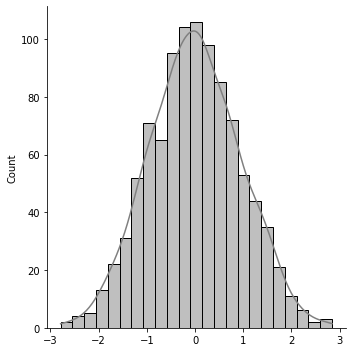

In [5]:
# graficamos los datos
sns.displot(datos_normales, kde = True, color = "grey");

In [6]:
# vamos a generar también unos datos no normales para hacer comparaciones a lo largo de la lección

datos_no_normales = np.random.random(1000) 
datos_no_normales[:20]

array([0.2146196 , 0.3742055 , 0.58984662, 0.30208459, 0.6318264 ,
       0.11281443, 0.41537973, 0.81675439, 0.26496136, 0.43947372,
       0.08907651, 0.99573961, 0.32974666, 0.94234191, 0.49842927,
       0.32991951, 0.85575822, 0.46061319, 0.33304831, 0.07179148])

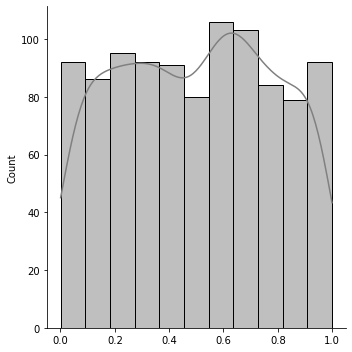

In [7]:
# graficamos los datos
sns.displot(datos_no_normales, kde = True, color = "grey");

Ahora vamos a comprobar que tipo de distribución tienen nuestras variables predictoras (belly, chest, hdlngth) y respuesta (age)

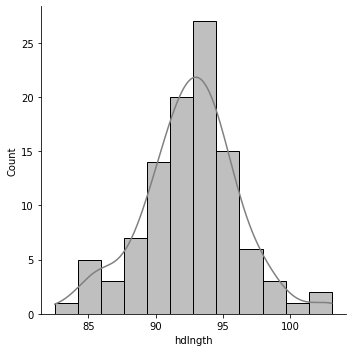

In [8]:
# graficamos los datos
sns.displot(df["hdlngth"], kde = True, color = "grey");

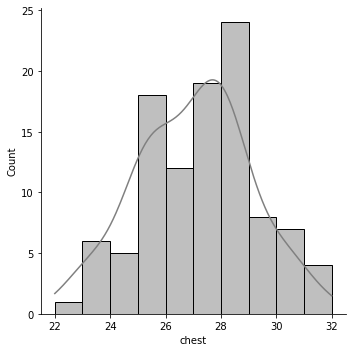

In [9]:
sns.displot(df["chest"], kde = True, color = "grey");

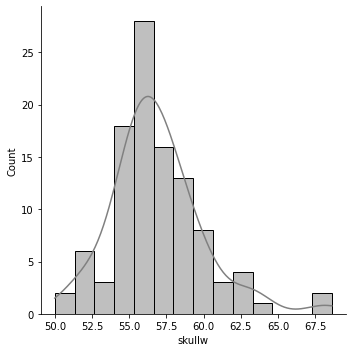

In [10]:
sns.displot(df["skullw"], kde = True, color = "grey");

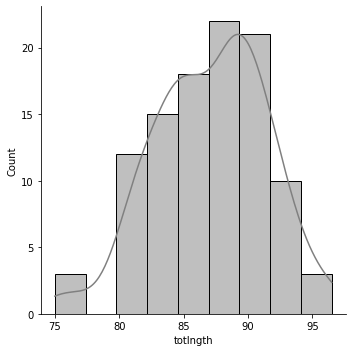

In [11]:
# graficamos los datos
sns.displot(df["totlngth"], kde = True, color = "grey");

Los valores están muy próximos a 0 ya que tienen una distribución simétrica normal

In [12]:
skew(df["hdlngth"])

-0.055163025308656875

El valor está muy próximo a 0 por tanto es una distribución simétrica normal

In [13]:
skew(df["chest"])

-0.05470688688328307

In [14]:
skew(df["skullw"])

0.9929491785251023

In [15]:
skew(df["totlngth"])

-0.28113476553828654

Nuestra variable respuesta es simétrica. El sesgo nos da un número cercano a 0, por lo tanto, una distribución simétrica

¿Qué tipo de curtosis presenta nuestra variable respuesta?

In [16]:
kurtosistest(df["hdlngth"])

KurtosistestResult(statistic=1.668830911237751, pvalue=0.09515089481015106)

Nuestra variable respuesta presenta curtosis leptocúrtica

¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [17]:
#Test de Shapiro para demostrar analíticamente si la variable respuesta es normal

In [18]:
stats.shapiro(df["hdlngth"])

ShapiroResult(statistic=0.9823063015937805, pvalue=0.1799636334180832)

In [19]:
#El pvalue es > que 0,05 por lo que se cumple la hipótesis nula, y nuestros datos son normales

In [20]:
df.to_csv("Datos/possum2.csv") 